## Metamodelos: Superfícies de Resposta

### Funções de Base Radial (RBF)

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Funções de Base Radial (RBF)' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 5; Qvar = 2; countFunc=0
c = 1.e-15 # Fator de forma
Qtp = 3000 # Quantidade de pontos p/ treinamento

xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
xp = np.zeros((Qtp,Qvar) , dtype = 'float')
U = np.zeros(Qtp , dtype = 'float')

xmin[0] = -5; xmin[1] = 0
xmax[0] = 10; xmax[1] = 15

#Pontos de treinamento
for i in range(0,Qtp):
    for j in range(0,Qvar):
        flag = True
        count=0
        while(flag):
            r[j] = random.random()
            aux = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
            for k in range(0,Qtp):
                if (xp[i,j] == aux):
                    count+=1
                if count==0:
                    flag = False
                    xp[i,j] = aux
    U[i],countFunc = f(xp[i,:],nFunc,Qvar,countFunc)

In [4]:
psi =np.zeros((Qtp,Qtp) , dtype = 'float')
for i in range(0,Qtp):
    for j in range(0,Qtp):
        aux = 0
        for k in range(0,Qvar):
            aux = aux + ((xp[i,k]-xp[j,k])**2)
        psi[i,j] = np.sqrt(aux+c**2)
        
phi = np.linalg.solve(psi,U)

In [5]:
def fobj(x_aval,xp,c,Qtp,Qvar,countFunc):
    U_aval = 0
    for j in range(0,Qtp):
        aux = 0
        for k in range(0,Qvar):
            aux = aux + ((x_aval[k]-xp[j,k])**2)
        U_aval = U_aval+(phi[j]*np.sqrt(aux+c**2))
        
    countFunc += 1
    return U_aval,countFunc

__Enxame de Partícula__ 

In [6]:
name = 'Enxame de Partículas + RBF' 

In [7]:
Qtind = 50; kmax = 150; countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

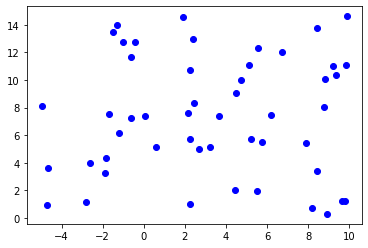

In [8]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = fobj(pop[i,:],xp,c,Qtp,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [9]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

2.666342279710988


In [10]:
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = fobj(x[i,:],xp,c,Qtp,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    fHist.append(fbest)
    

9.52945 2.96659 0.63884
9.42180 2.49402 0.42034
9.42180 2.49402 0.42034
9.38275 2.52235 0.41997
9.41467 2.54567 0.40827
9.41444 2.54374 0.40824
9.41644 2.54337 0.40819
9.41805 2.54363 0.40818
9.41753 2.54387 0.40818
9.41808 2.54480 0.40818
9.41878 2.54523 0.40818
9.41847 2.54501 0.40818
9.41847 2.54501 0.40818
9.41850 2.54501 0.40818
9.41850 2.54501 0.40818
9.41849 2.54501 0.40818
9.41849 2.54501 0.40818
9.41849 2.54501 0.40818
9.41849 2.54501 0.40818
9.41849 2.54501 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 0.40818
9.41849 2.54500 

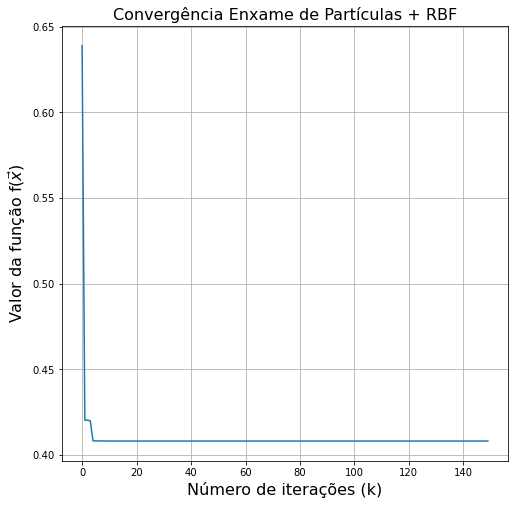

In [11]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [12]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  7550
Tempo de Execução = 157.90066957473755 s
